# Instagram reach analysis using python


In [105]:
import pandas as pd

In [106]:
import numpy as np

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import matplotlib.pyplot as plt

In [111]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import seaborn as sns

In [113]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import plotly.express as px

In [115]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [117]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [120]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
from sklearn.datasets import load_iris

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree


# read data

In [124]:
data = pd.read_csv("Instagram data.csv", encoding= "latin1")

In [125]:
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# load data

In [126]:
iris= load_iris()
X = iris.data  
y = iris.target

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# checking null values

In [128]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

# drop null values

In [129]:
data = data.dropna()

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# distribution of impressions

In [131]:
plt.figure(figsize=(10,8))

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

In [132]:
plt.style.use("fivethirtyeight")

Text(0.5, 1.0, 'Distro of Impressions From home')

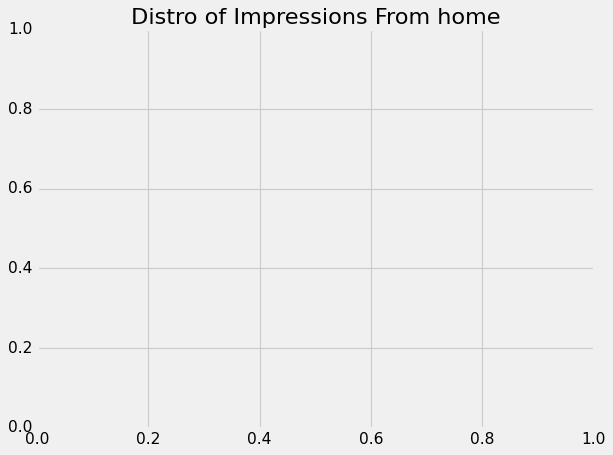

In [133]:
plt.title("Distro of Impressions From home")

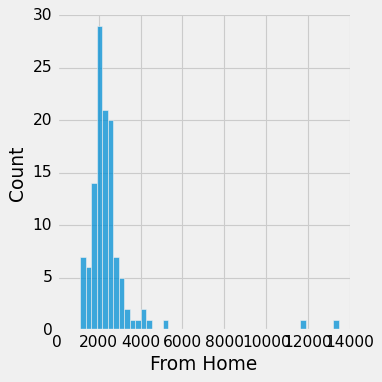

In [134]:
sns.displot(data["From Home"])
plt.show()

In [135]:
plt.figure(figsize=(10,8))

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

Text(0.5, 1.0, 'Distro of Impressions From Hastages')

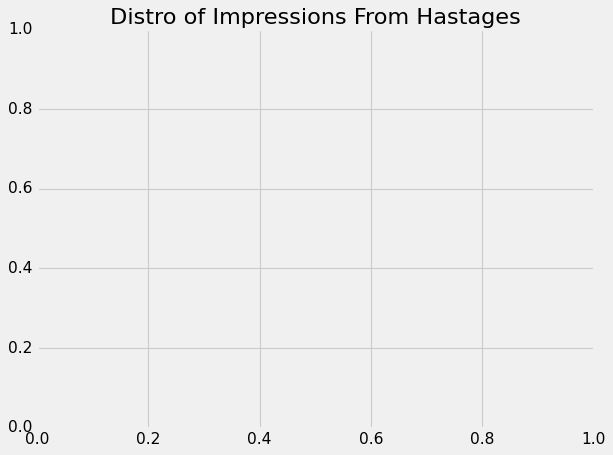

In [136]:
plt.title("Distro of Impressions From Hastages")

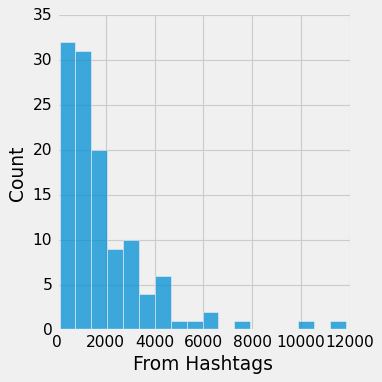

In [137]:
sns.displot(data["From Hashtags"])
plt.show()

In [138]:
plt.figure(figsize=(10,8))

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

Text(0.5, 1.0, 'Distro of Impressions From Explore')

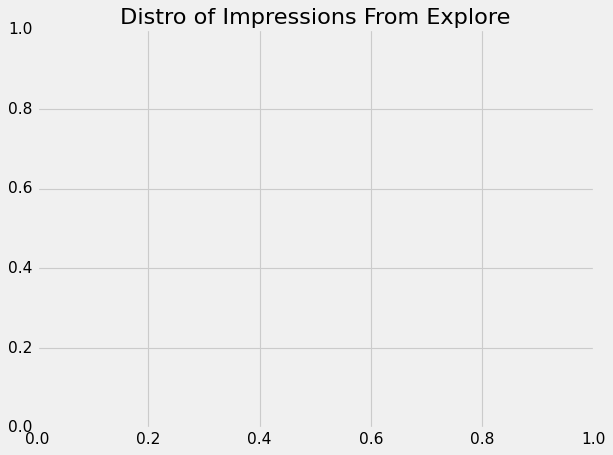

In [139]:
plt.title("Distro of Impressions From Explore")

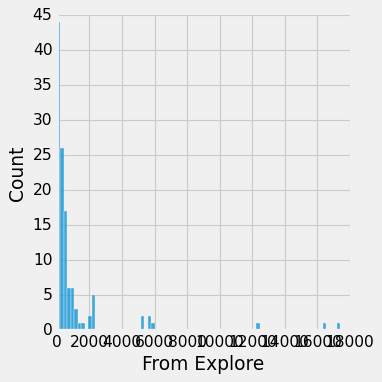

In [140]:
sns.displot(data["From Explore"])
plt.show()

In [141]:
home= data["From Home"].sum()

In [142]:
hashtags= data["From Hashtags"].sum()

In [143]:
explore= data["From Explore"].sum()

In [144]:
othre= data["From Other"].sum()

In [145]:
labels = ["From Home", "From Hashtags", "From Explore", "Othre"]

In [146]:
values= [home, hashtags, explore, othre]

In [147]:
fig= px.pie(data, values = values, names = labels, title = 'Impressons of instagram posts various src', hole=0.5)

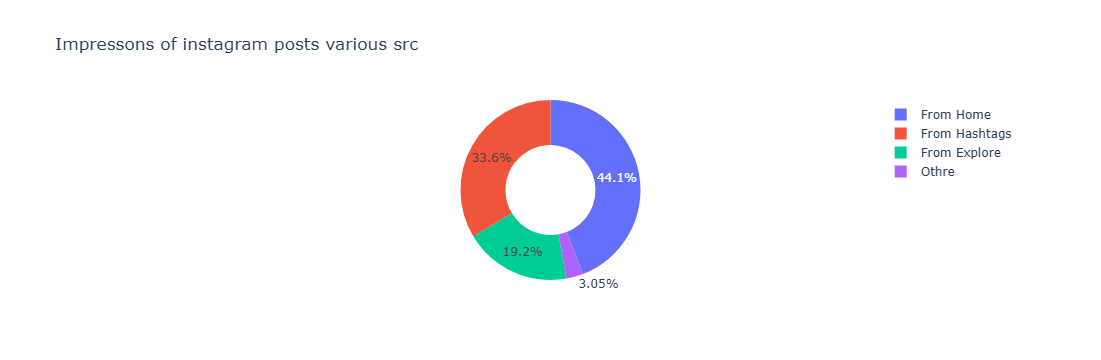

In [148]:
fig.show()

# analyzing content

In [149]:
# lets check most used words

In [150]:
text= "".join (i for i in data.Caption)

In [151]:
stopwords = set(STOPWORDS)

In [152]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

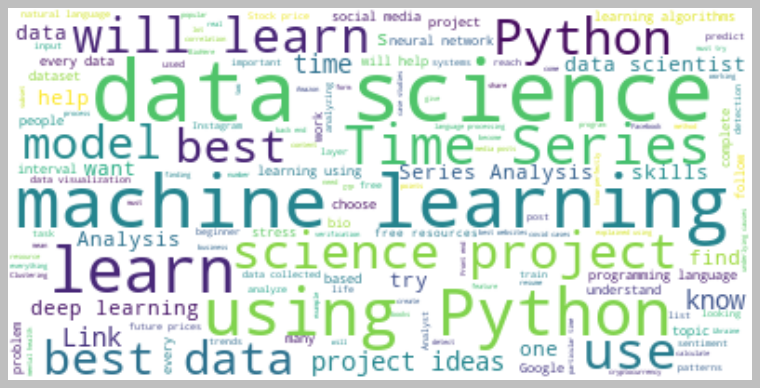

In [153]:
plt.style.use("classic")
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [154]:
# lets check most used hashtags

In [155]:
text= "".join (i for i in data.Hashtags)

In [156]:
stopwords = set(STOPWORDS)

In [157]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

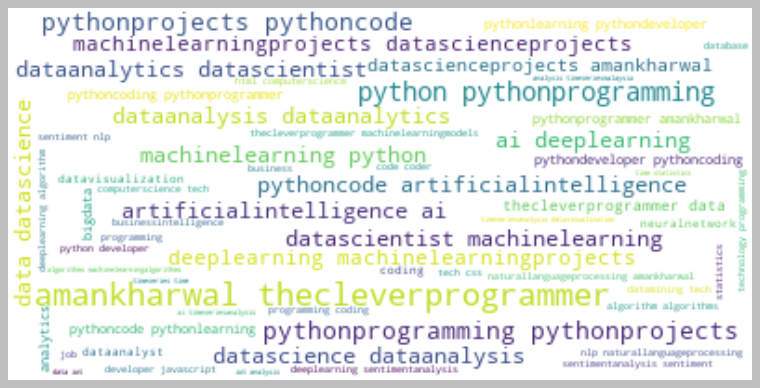

In [158]:
plt.style.use("classic")
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# analyzing relationships

In [159]:
# relationship between number of likes ane number of impressions

In [160]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
import statsmodels.api as sm

In [162]:
figure =px.scatter(data_frame= data, x="Impressions", y="Likes", size="Likes", trendline="ols", title="Relationship between Likes and Total Impressions")

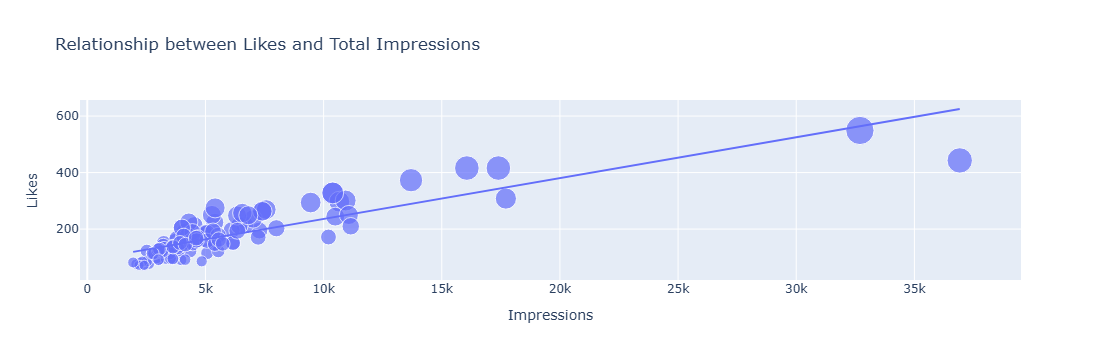

In [163]:
figure.show()

In [164]:
# relationship between comments and impressions

In [165]:
figure =px.scatter(data_frame= data, x="Impressions", y="Comments", size="Comments", trendline="ols", title="Relationship between Comments and Total Impressions")

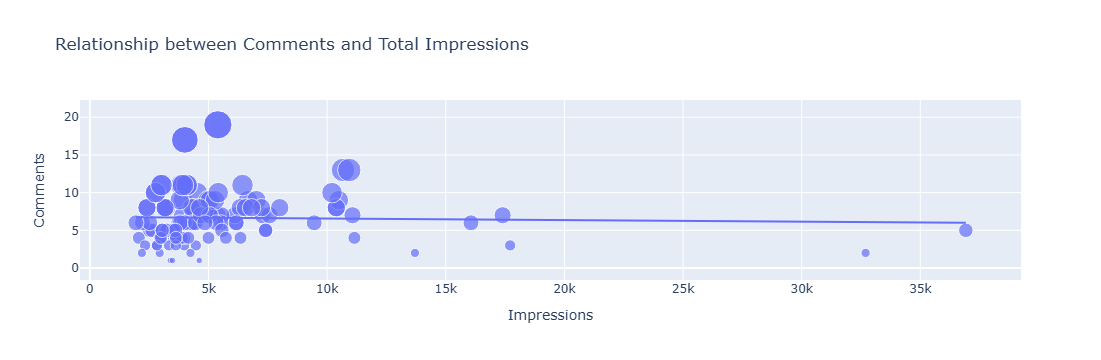

In [166]:
figure.show()

In [167]:
# relationship between shares and impressions

In [168]:
figure =px.scatter(data_frame= data, x="Impressions", y="Shares", size="Shares", trendline="ols", title="Relationship between Shares and Total Impressions")

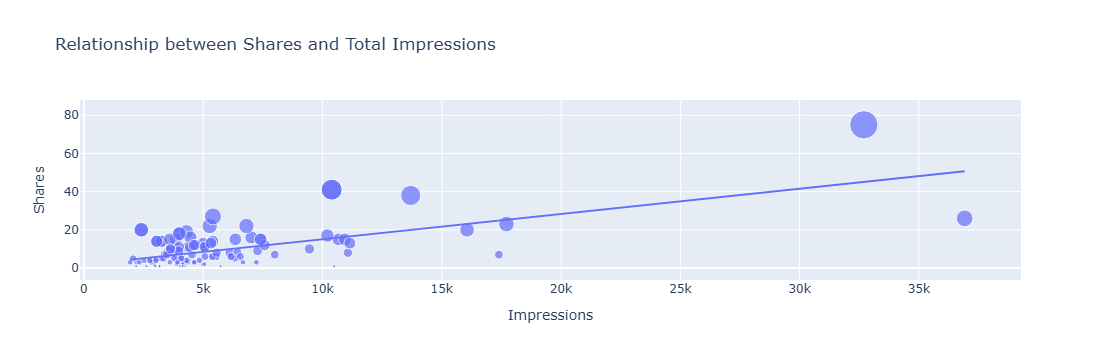

In [169]:
figure.show()

In [170]:
# relationship between saves and impressions

In [171]:
figure =px.scatter(data_frame= data, x="Impressions", y="Saves", size="Saves", trendline="ols", title="Relationship between Saves and Total Impressions")

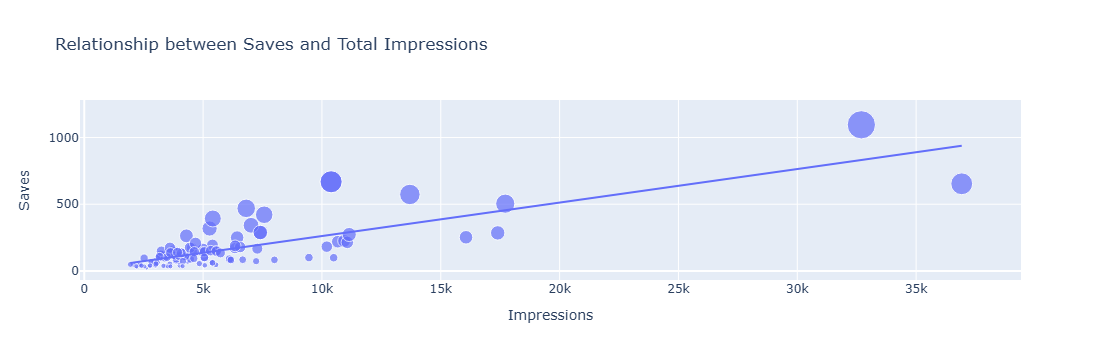

In [172]:
figure.show()

# check correlation

In [173]:
# check correlation of all columns with the impressions column

In [174]:
data= data.select_dtypes(include='number')

In [175]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


# analyzing conversion rate

In [176]:
# coversion rate = (Follows / Profile Visit) *100

In [177]:
data.columns = data.columns.str.strip()

In [178]:
print([col for col in data.columns if 'follow' in col.lower()])

['Follows']


In [179]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100

In [180]:
print(conversion_rate)

41.00265604249668


In [181]:
# 41% conversion rate

In [182]:
# look at relationship between total profile visits and number of followers gained from all profile visits

In [183]:
figure= px.scatter(data_frame= data, x="Profile Visits", y= "Follows", size="Follows", trendline="ols", title= "Relationship between Profile Visits and Followers Gained")

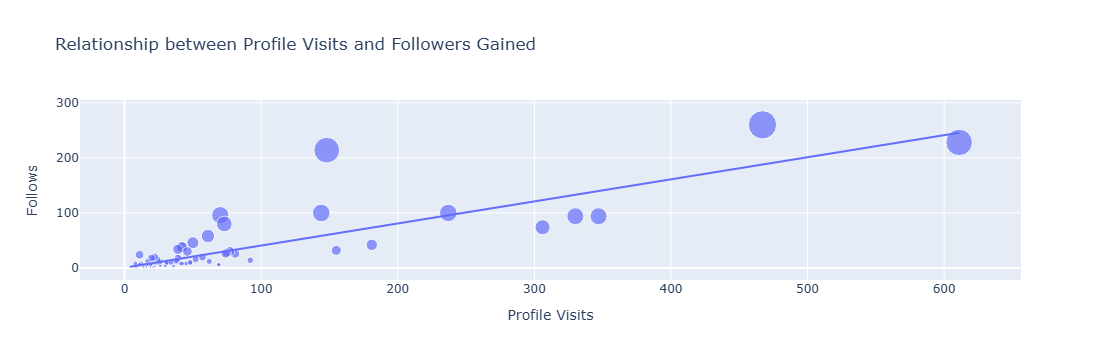

In [184]:
figure.show()

# instagram reach prediction model

In [185]:
# instagram reach prediction model

In [186]:
x= np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])

In [187]:
y= np.array(data["Impressions"])

In [188]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [189]:
model =PassiveAggressiveRegressor()

In [190]:
model.fit(xtrain, ytrain)

PassiveAggressiveRegressor()

In [191]:
model.score(xtest, ytest)

0.6976629248750577

In [192]:
#features ="Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"

In [193]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

In [194]:
model.predict(features)

array([8483.21884195])

In [195]:
# 11462

# decision tree

Accuracy: 0.9555555555555556
Accuracy of rdf: 0.9555555555555556


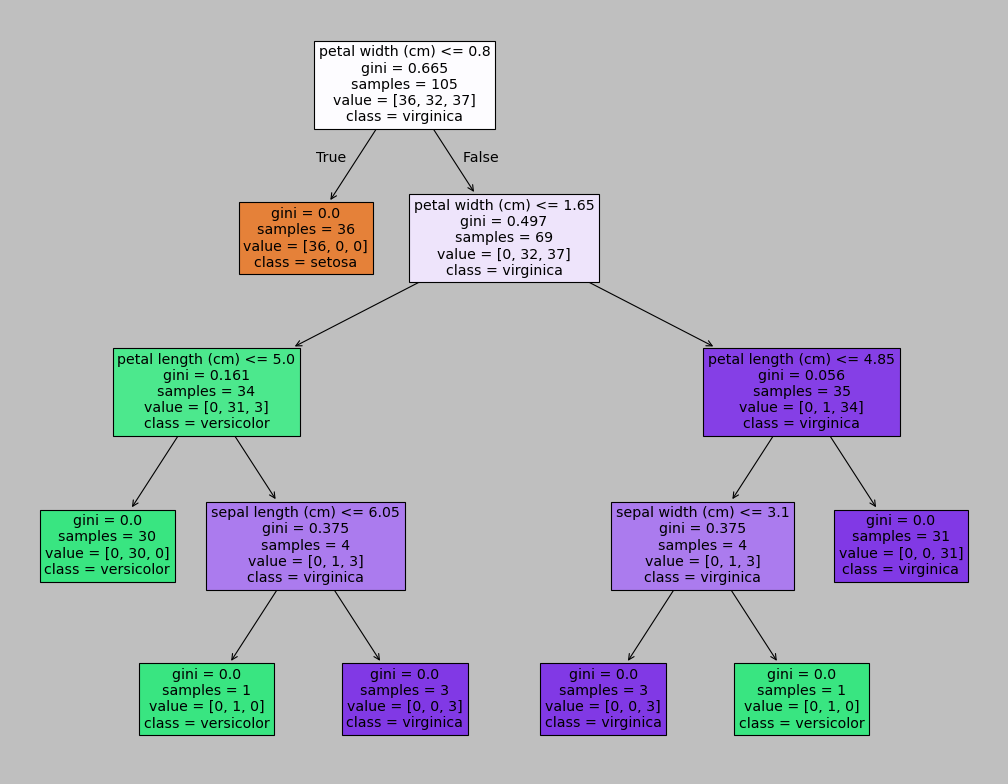

In [200]:
clf = DecisionTreeClassifier()
rdf =  RandomForestClassifier(n_estimators=100,max_depth=20,random_state=42)
clf = clf.fit(X_train, y_train)
rdf = rdf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred1 = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Accuracy of rdf:", metrics.accuracy_score(y_test, y_pred1))
plt.figure(figsize=(16, 12))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [209]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}")

Model Accuracy: 95.56


In [ ]:
# end